### mid 2 past

## KNN

In [ ]:
# (a) Drop unnecessary columns
cols_to_drop = ['Name', 'Ticket', 'Cabin']
train_data.drop(cols_to_drop, axis=1, inplace=True)

# (b) Create dummy variables for specified columns and then drop the original columns
cols_for_dummies = ['Pclass', 'Sex', 'Embarked']
train_data = pd.get_dummies(train_data, columns=cols_for_dummies, drop_first=True)

# (c) Fill missing age values using interpolation
train_data['Age'] = train_data['Age'].interpolate()

# (d) Sort by 'Survived' in ascending order
train_data_sorted = train_data.sort_values(by='Survived')

## q# 2 past mid

# Define the features and target
features = iris_df[['Sepal_length', 'Sepal_width', 'Petal_width']]
target = iris_df['Species']

# Encode the categorical target variable
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# Apply K-NN classifier
knn_accuracies = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    cv_scores = cross_val_score(knn, features, target_encoded, cv=5)
    knn_accuracies.append(cv_scores.mean())

# Find the highest accuracy and the corresponding K
highest_accuracy = max(knn_accuracies)
best_k = knn_accuracies.index(highest_accuracy) + 1  # Adding 1 because index starts at 0


# Applying K-NN with Manhattan distance and 5-fold Cross-validation
kf = KFold(n_splits=5, random_state=7, shuffle=True)
highest_accuracy = 0
best_k = 0

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    cv_scores = cross_val_score(knn, iris_features, iris_labels, cv=kf, scoring='accuracy')
    mean_cv_scores = np.mean(cv_scores)
    if mean_cv_scores > highest_accuracy:
        highest_accuracy = mean_cv_scores
        best_k = k

highest_accuracy, best_k







#### #question # 3 .. rmse, diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns


np.random.seed(7)  # for reproducible results
diabetes_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_data = pd.DataFrame({
    'Pregnancies': np.random.randint(0, 15, size=100),
    'Glucose': np.random.randint(50, 200, size=100),
    'BloodPressure': np.random.randint(30, 120, size=100),
    'SkinThickness': np.random.randint(0, 50, size=100),
    'Insulin': np.random.randint(15, 276, size=100),
    'BMI': np.random.uniform(18.5, 50, size=100),
    'DiabetesPedigreeFunction': np.random.uniform(0.1, 2.5, size=100),
    'Age': np.random.randint(21, 80, size=100),
    'Outcome': np.random.choice([0, 1], size=100)
})

# Question 3, Part (a)
# Selecting the baseline attributes
baseline_attributes = diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Standardizing the dataset
scaler = StandardScaler()
diabetes_scaled = scaler.fit_transform(baseline_attributes)

# Applying K-Means and drawing the elbow curve
sse = {}
for n_clusters in range(1, 8):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=7).fit(diabetes_scaled)
    sse[n_clusters] = kmeans.inertia_  # sum of squared distances to closest cluster center

# Plotting the elbow curve
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('The Elbow Method')
plt.show()

# Question 3, Part (b)
# Applying Linear Regression
# Assuming 'BloodPressure' as the dependent variable and 'Glucose', 'DiabetesPedigreeFunction' as independent variables
X = diabetes_data[['Glucose', 'DiabetesPedigreeFunction']]
Y = diabetes_data['BloodPressure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicting and calculating the RMSE
predictions = lin_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

sns.pairplot(diabetes_data, x_vars=['Glucose', 'DiabetesPedigreeFunction'], y_vars='BloodPressure', height=5, aspect=0.7, kind='reg')

rmse




##knn

In [ ]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#  Load data set using pandas library
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv("iris.csv", names=names,  skiprows=1)

# (b) Print the size of data set

print(dataset.shape)

print(dataset.head())

print(dataset.groupby('class').size())

array = dataset.values
X = array[:,0:4]
Y = array[:,4]
t_size = 0.20
seed = 7
X_train_iris, X_test_iris, Y_train_iris, Y_test_iris = train_test_split(X, Y, test_size=t_size, random_state=seed)

print(X_test_iris)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_iris, Y_train_iris)

predictions = knn.predict(X_test_iris)

print("Accuracy Score: \n")
print(accuracy_score(Y_test_iris, predictions))

print("\nConfusion Matrix: \n")
print(confusion_matrix(Y_test_iris, predictions))

print("\nClassification : \n")
print(classification_report(Y_test_iris, predictions))


print("Accuracy for different k values:")
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_iris, Y_train_iris)
    predictions = knn.predict(X_test_iris)
    accuracy = accuracy_score(Y_test_iris, predictions)
    print(f"k = {k}: Accuracy = {accuracy:.4f}")


### use .values if doing manually :

# Load the two test datasets
test_dataset1 = pd.read_csv("datatest.txt", names=columns, header=0)
test_dataset2 = pd.read_csv("datatest2.txt", names=columns, header=0)

# Concatenate the two datasets
test_dataset = pd.concat([test_dataset1, test_dataset2], ignore_index=True)
test_dataset = test_dataset.drop('date', axis=1)

# Splitting features and target variable for both training and test datasets
X_trainOc = train_data.drop('occupancy', axis=1).values
Y_trainOc = train_data['occupancy'].values
X_testOc = test_dataset.drop('occupancy', axis=1).values
Y_testOc = test_dataset['occupancy'].values

knn = KNeighborsClassifier()
knn.fit(X_trainOc, Y_trainOc)

predictions = knn.predict(X_testOc)

print("Accuracy Score: \n")
print(accuracy_score(Y_testOc, predictions))

print("\nConfusion Matrix: \n")
print(confusion_matrix(Y_testOc, predictions))

print("\nClassification : \n")
print(classification_report(Y_testOc, predictions))





###################chi

import numpy as np
import pandas as pd
from collections import Counter



# Euclidean Distance Function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Manhattan Distance Function
def manhattan_distance(a, b):
    return np.sum(abs(a - b))

# Chi-squared distance function
def chi_squared_distance(A, B):
    return 0.5 * np.sum([((a - b) ** 2) / (a + b)
                   for (a, b) in zip(A, B)])

# kNN classifier
def knn_classify(X_train, y_train, test_point, k=3):
    distances = [(y, chi_squared_distance(X, test_point)) for X, y in zip(X_train, y_train)]
    distances.sort(key=lambda x: x[1])
    top_k_labels = [item[0] for item in distances[:k]]
    most_common = Counter(top_k_labels).most_common(1)
    return most_common[0][0]


# using Iris dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv("iris.csv", names=names,  skiprows=1)

array = dataset.values
X = array[:,0:4]
Y = array[:,4]
t_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t_size, random_state=seed)

# Testing kNN classifier on Iris
print("Accuracy for different k values:")
for k in range(1, 11):
    y_pred = [knn_classify(X_train, Y_train, x, k=k) for x in X_test]
    accuracy = np.mean(y_pred == Y_test)
    print(f"k = {k}: Accuracy = {accuracy:.4f}")



# Using a smaller subset for quick verification
X_test_sample = X_testOc[:100]
Y_test_sample = Y_testOc[:100]

print("Accuracy for different k values for kNN classifier:")

for k in range(1, 11):
    y_pred = [knn_classify(X_trainOc, Y_trainOc, x, k=k) for x in X_test_sample]
    accuracy = np.mean(y_pred == Y_test_sample)
    print(f"k = {k}: Accuracy = {accuracy:.4f}")


FileNotFoundError: ignored

## k means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
data1 = pd.read_csv('cereal.csv')
data1.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
data1.describe()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [ ]:
data1.drop('name', axis = 1, inplace = True)

In [ ]:
data1['mfr'].value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

In [ ]:
data1['type'].value_counts()

C    74
H     3
Name: type, dtype: int64

In [ ]:
data1['mfr'] = data1['mfr'].replace({'K': 1, "G": 2, "P":3, "Q":4,
                                     "R":5, "N":6, "A":7})
data1['type'] = data1['type'].replace({"C":0, "H":1})


In [ ]:
pd.DataFrame(data1).describe()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,2.714286,0.038961,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,1.692531,0.194771,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,1.000000,0.000000,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,1.000000,0.000000,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,2.000000,0.000000,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,4.000000,0.000000,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,7.000000,1.000000,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
data1.isna().sum()

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [ ]:
## standard scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_scaled = ss.fit_transform(data1)

data1.head()



,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,6,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,4,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,1,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,1,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,5,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
# kmeans

km = KMeans(n_clusters = 3, init = 'random')
km.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [ ]:
km.inertia_

807.5385197616906

In [ ]:
km.n_iter_

8

In [ ]:
pred = km.predict(data_scaled)
pred

array([2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, ' c vs inertia ')

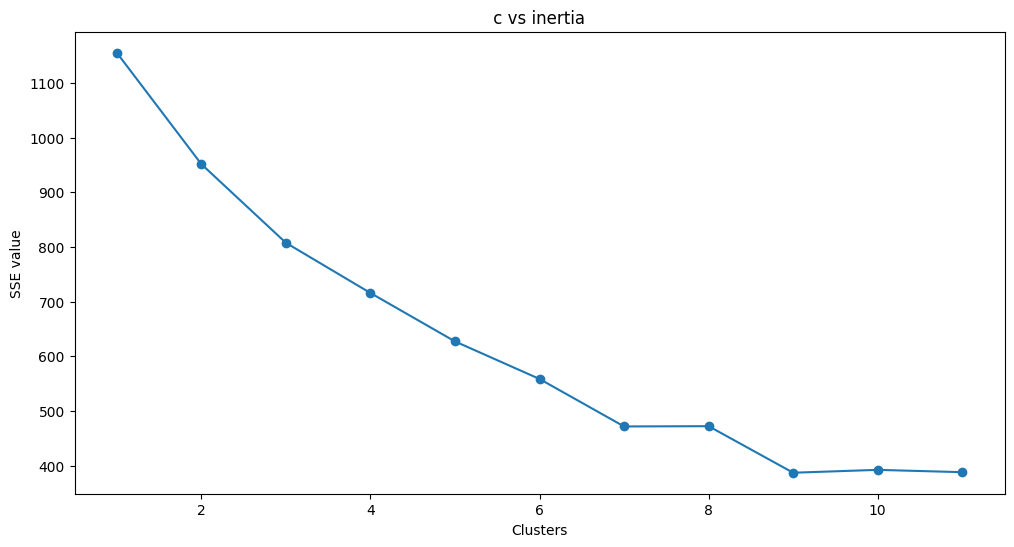

In [ ]:
sse = []
for cluster in range(1,12):
  km = KMeans(n_clusters = cluster, init = 'random')
  km.fit(data_scaled)
  sse.append(km.inertia_)


cluster = range(1,12)
sse = np.array(sse)
plt.figure(figsize=(12,6))
plt.plot(cluster, sse, marker = 'o')
plt.xlabel("Clusters")
plt.ylabel("SSE value")
plt.title(" c vs inertia ")
# # Converting the results into a NumPy array and plotting them
# clusters = np.arange(1, 12)
# SSE = np.array(SSE)
# plt.figure(figsize=(12, 6))
# plt.plot(clusters, SSE, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()




## silhouette coefficeint

In [ ]:
from sklearn.metrics import silhouette_score
km = KMeans(n_clusters =4, init ='random')
km.fit(data_scaled)
pred = km.predict(data_scaled)

print("sil coeff with 4 clusters : ", silhouette_score(data_scaled, pred))


sil coeff with 4 clusters :  0.18981731262684604


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
## implement kmeans now

km = KMeans(n_clusters = 4, init = 'k-means++')
km.fit(data_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

## linear regression

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Generate 'random' data
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head()

xmean = np.mean(X)
ymean = np.mean(y)

df['xyconv'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean) **2


## calculate
beta = df['xyconv'].sum() / df['xvar'].sum()
alpha = ymean - beta * xmean

print(alpha, beta)
y_pred = alpha + beta*X
y_pred


,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


In [ ]:
### linear regression and sse values

from sklearn.linear_model import LinearRegression

adv = pd.read_csv('Advertising.csv')
adv.head()

pred = ['TV']
X = adv[pred]
y = adv['Sales']
lm = LinearRegression()
model = lm.fit(X, y)

In [ ]:
print(f"alpha : {lm.intercept_}")
print(f"beta : {lm.coef_}")

alpha : 7.032593549127695
beta : [0.04753664]


In [ ]:
y_pred = lm.predict(X)

sse = np.sum((y-y_pred)**2)
print(f'sse : {sse}')

sse : 2102.5305831313512


TypeError: ignored

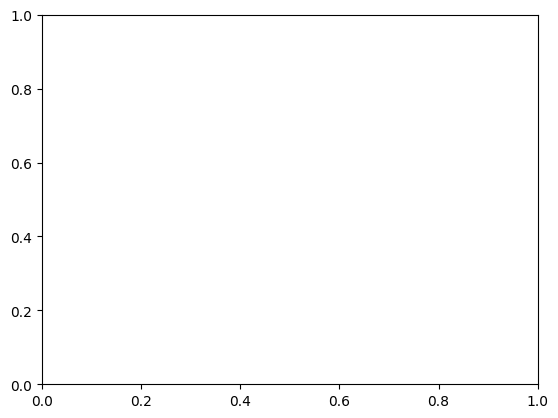

In [ ]:
import matplotlib.pyplot as plt
# sse_values = [sse1, sse2, sse3]
# num_predictors = [1,2, 3]
sse = [sse]
num_pred = [1]
# plt.plot(num_predictors, sse_values, marker='o', color='blue', linestyle='-', markersize=8)

# plt.bar(num_predictors, sse_values, color='blue')
plt.xlabel('Number of Predictor Variables')
plt.ylabel('SSE')
plt.title('SSE vs. Number of Predictor Variables')
plt.xticks(num_pred)
plt.show()


In [ ]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']


from sklearn import preprocessing

le = preprocessing.LabelEncoder()
weather_e = le.fit_transform(weather)
temp_e = le.fit_transform(temp)


In [ ]:
label = le.fit_transform(play)
label

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
## combine

features = list(zip(weather_e, temp_e))
features = np.array(features)


In [ ]:
from sklearn.naive_bayes import GaussianNB
### gb
gb = GaussianNB()
gb.fit(features, label)

predict = gb.predict([[0,2]])
print(predict)

[1]


## naive bayes

In [ ]:
# Importing necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Generating a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Training the classifier on the training data
gnb.fit(X_train, y_train)

# Making predictions on the test data
y_pred = gnb.predict(X_test)

# Calculating the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.81

In [ ]:
# importing required libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# read the train and test dataset
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop('Survived',axis=1)
train_y = train_data['Survived']

# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

'''
Create the object of the Naive Bayes model
You can also add other parameters and test your code here
Some parameters are : var_smoothing
Documentation of sklearn GaussianNB:

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

 '''
model = GaussianNB()

# fit the model with the training data
model.fit(train_x,train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Shape of training data : (712, 25)
Shape of testing data : (179, 25)
Target on train data [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1

## PCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from numpy.linalg import eig

df = pd.read_csv('cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
df.drop('name', axis = 1, inplace = True)

df['mfr'].value_counts()

df['type'].value_counts()

df["mfr"] = df["mfr"].replace({"K": 1, "G": 2, "P": 3, "Q": 4,
                    "R": 5, "N": 6, "A": 7})
df["type"] = df["type"].replace({"C": 0, "H": 1})


df.isna().sum()
## numpy array

df = df.to_numpy()

dft = df.transpose()
dft

product = np.matmul(df, dft)
product

eigen_value, eigen_vector = np.linalg.eig(product)
print(eigen_vector)
print(eigen_value)


## remove

eigen_vector = np.delete(eigen_vector, np.argmin(eigen_value), axis = 1)


print(df.shape)
print(eigen_vector.shape)


# insert in array

df = np.insert(df, [15], np.zeros((77, 62)), axis = 1)

print(df.shape)


## mul now possible
pca = np.matmul(df, eigen_vector)

u, s, v = np.linalg.svd(df, full_matrices = True)

print(u.shape)
print(s.shape)
print(v.shape)

print(u)
print(s)
print(v)

(77, 77)


###   2nd data for PCA

In [ ]:


import numpy as np

df2 = pd.read_csv('ground_day.csv')
df2.head()

df2.drop(index = 131, axis = 0, inplace = True)

df2.dtypes

df2.drop('Punxsutawney Phil', axis = 1, inplace = True)
df2['Year'] = df2['Year'].astype('float64')

df2.isna().sum()
df2 = df2.fillna(df.mean())

arr2 = df2.to_numpy()
arr2

arr2t = arr2.transpose()
arr2t


matrix_rank = np.linalg.matrix_rank(A)


prod = np.matmul(arr2, arr2t)
prod

eigen_value, eigen_vector = np.linalg.eig(prod)
print(eigen_value)
print(eigen_vector)

## delete vectors lowest values

eigen_vector = np.delete(eigen_vector, np.argmin(eigen_value), axis = 1)

print(eigen_vector.shape)
print(arr2.shape)

## insert rows
arr2 = np.insert(arr2, [9], np.zeros((131, 122)), axis = 1)

print(eigen_vector.shape)
print(arr2.shape)

pca = np.matmul(arr2, eigen_vector)
pca

u, s, v = np.linalg.svd(arr2, full_matrices= True)
u.shape
s.shape
v.shape

#NLP

In [ ]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## sentence token

In [ ]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. Smith, how are you doing today? The weather is great,
 and city is awesome. The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)

# total number of sentences in the file
num_sentences = len(tokenized_text)
print("Total number of sentences:", num_sentences)

['Hello Mr. Smith, how are you doing today?', 'The weather is great,\n and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]
Total number of sentences: 4


## word token

In [ ]:
# converting text into tokens

from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

for i in tokenized_word:
  print(nltk.pos_tag([i]))

['vote', 'to', 'choose', 'a', 'particular', 'man', 'or', 'a', 'group', '(', 'party', ')', 'to', 'represent', 'them', 'in', 'parliament']
[('vote', 'NN')]
[('to', 'TO')]
[('choose', 'NN')]
[('a', 'DT')]
[('particular', 'JJ')]
[('man', 'NN')]
[('or', 'CC')]
[('a', 'DT')]
[('group', 'NN')]
[('(', '(')]
[('party', 'NN')]
[(')', ')')]
[('to', 'TO')]
[('represent', 'NN')]
[('them', 'PRP')]
[('in', 'IN')]
[('parliament', 'NN')]


## Frequency Distribution


In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)
# 25 unique words and occured 30 times

<FreqDist with 25 samples and 30 outcomes>


In [ ]:
fdist.most_common(4)

[('is', 3), (',', 2), ('The', 2), ('.', 2)]

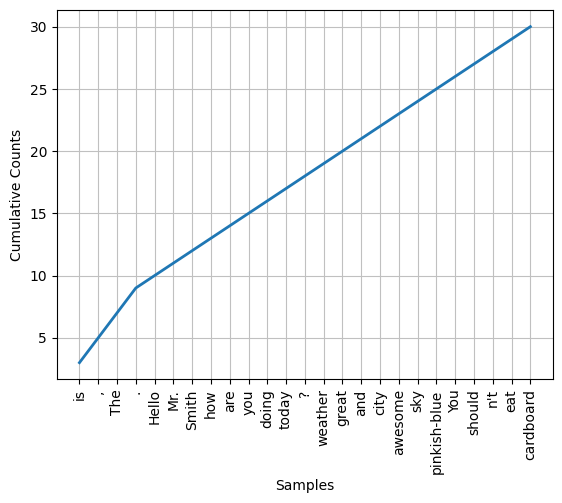

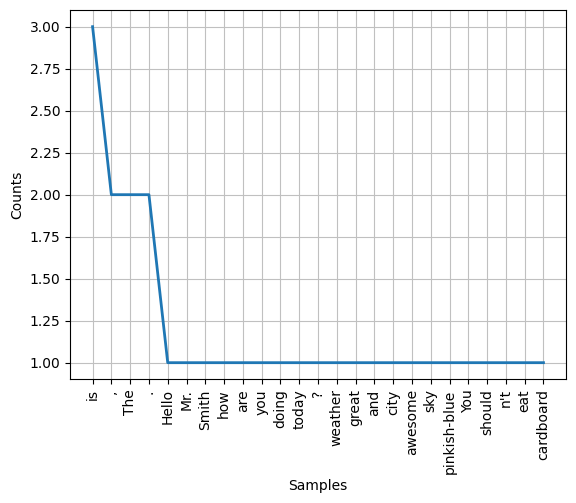

In [ ]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=True)
plt.show()

import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

## stopwords

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = set(stopwords.words('english'))
print(sw)

{'it', 'through', 'wasn', 'until', 'doesn', 'when', 'where', "you're", 'yourselves', 'being', 'm', 'o', 'couldn', 'ain', "she's", 'theirs', 'own', 'these', 'her', 'them', 'which', 'y', 'there', 's', 'does', 'while', 'with', 'will', "it's", 'all', "weren't", 'any', 'same', 'shouldn', "you'd", 'on', 'because', 'why', 'they', 'here', 'i', 'very', 'do', 're', 'more', 'can', 'of', 'just', "won't", 'this', 'but', 'too', "hadn't", 'shan', 'during', 'haven', 'that', 'weren', 'below', 'aren', 'out', 'under', "that'll", 'most', 'such', 'isn', 'his', 'from', 'few', 'between', "you've", "isn't", 'only', 'the', 'themselves', "wouldn't", "doesn't", 'been', 'above', 'your', 'herself', 'having', 'for', 'up', "aren't", 't', "should've", 'or', 'to', 'are', 'was', 'so', 'me', 'as', 'before', 'into', 'wouldn', 'our', 'each', 'other', 'after', 'didn', 'about', 'don', 'nor', 'and', 'yours', 'against', 'mightn', "shan't", 'no', 'now', 'further', 'a', "mustn't", 'he', 'him', 'has', "hasn't", 'am', 'its', 'dow

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
filtered_sent=[]
for w in tokenized_text:
  if w not in sw:
    filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_text)
print("Filterd Sentence:",filtered_sent)


Tokenized Sentence: ['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]
Filterd Sentence: ['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


## Stemming

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('working'))

work


## wordnet

In [ ]:
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('increases'))


increase


## pos tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')

text = "vote to choose a particular man or a group (party) to represent them in parliament"
tex = word_tokenize(text) #Tokenize the text
for i in tex:
  print(nltk.pos_tag([i]))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('vote', 'NN')]
[('to', 'TO')]
[('choose', 'NN')]
[('a', 'DT')]
[('particular', 'JJ')]
[('man', 'NN')]
[('or', 'CC')]
[('a', 'DT')]
[('group', 'NN')]
[('(', '(')]
[('party', 'NN')]
[(')', ')')]
[('to', 'TO')]
[('represent', 'NN')]
[('them', 'PRP')]
[('in', 'IN')]
[('parliament', 'NN')]


## one hot encoding / countvectorizer

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# corpus = [
# 'This is the first document.',
# 'This document is the second document.',
# 'And this is the third one.',
# 'Is this the first document?',
# ]
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names())
# # ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
# print(X.toarray())


from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

print("Feature Names:", feature_names)

print(X.toarray())

print('Vocabulary: ')
print(vectorizer.vocabulary_)

Feature Names: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
Vocabulary: 
{'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}


# TFIDF

### Consider the following two Documents:

Document 1: The bus is driven on the motorway by Mohsin.

Document 2: The truck is driven on the highway by Mohsin.

Write python code to find the TF-IDF for the above two documents, which represent our corpus

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

document1 = "The bus is driven on the motorway by Mohsin."
document2 = "The truck is driven on the highway by Mohsin."

corpus = [document1, document2]

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(corpus)

feature_names = vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.toarray()

import pandas as pd
df = pd.DataFrame(tfidf_values, columns=feature_names)

# Print the TF-IDF matrix
print("Feature Names:", feature_names)
print("TF-IDF Matrix:")
df.head(10)


Feature Names: ['bus' 'by' 'driven' 'highway' 'is' 'mohsin' 'motorway' 'on' 'the' 'truck']
TF-IDF Matrix:


,bus,by,driven,highway,is,mohsin,motorway,on,the,truck
0,0.390548,0.277878,0.277878,0.000000,0.277878,0.277878,0.390548,0.277878,0.555756,0.000000
1,0.000000,0.277878,0.277878,0.390548,0.277878,0.277878,0.000000,0.277878,0.555756,0.390548


# Plots/visualization

In [ ]:
!pip install nbmerge

  Preparing metadata (setup.py) ... done
  Created wheel for nbmerge: filename=nbmerge-0.0.4-py2.py3-none-any.whl size=6393 sha256=f051ae354d022bf7ca0cd0c77f7ef210df343781c045cde74291ff556da18e74
  Stored in directory: /root/.cache/pip/wheels/ab/6a/28/a33b228ce3eda9a7cc2cfd050b24752d09ac76a13733738df5
Successfully built nbmerge


In [ ]:
!nbmerge Visualization_Lab_20K_0409.ipynb > final.ipynb

# Importing Libraries

In [83]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Lab Task 1:

1. Plot revenue vs time.

2. Plot costs vs time on the same plot as the last line.

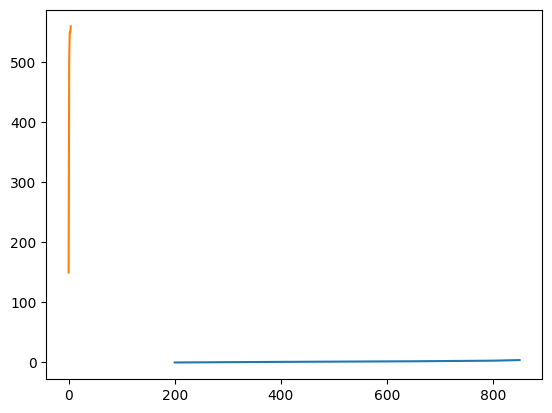

In [2]:

time = [0, 1, 2, 3, 4]

revenue = [200, 400, 650, 800, 850]

costs = [150, 500, 550, 550, 560]

plt.plot(revenue, time)

plt.plot(time, costs)

plt.show()

## Lab Task 2:

1. Plot revenue vs. time as a purple ('purple'), dashed ('--') line.

2. Plot costs vs. time as a line with the HEX color #82edc9 and square ('s') markers.

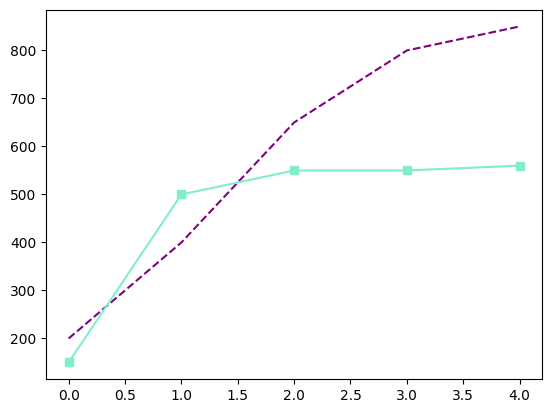

In [3]:
plt.plot(time, revenue, color="purple", linestyle='--')

plt.plot(time, costs, color="#82edc9", marker='s')

plt.show()

## Lab Task 3:

Spending on coffee over the past 12 years.


1. Use plt.axis() to modify the axes so that the x-axis goes from 0 to 12, and the y-axis goes from 2900 to 3100.

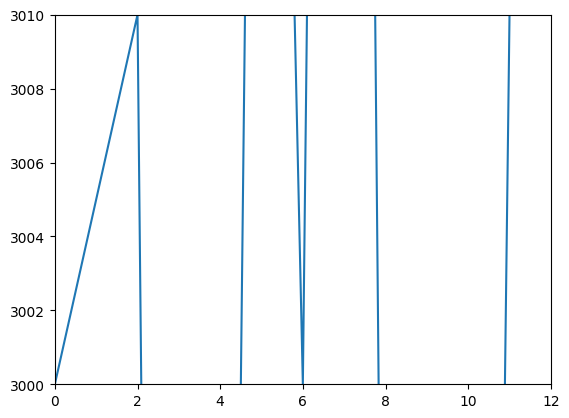

In [8]:
x = range(12)

y = [3000, 3005, 3010, 2900, 2950, 3050, 3000, 3100, 2980, 2980, 2920, 3010]

plt.plot(x, y)

plt.axis([0, 12, 3000, 3010])

plt.show()

## Lab Task 4:

1. Label the x-axis 'Time'.

2. Label the y-axis 'Dollars spent on coffee'.

3. Add the title 'My Last Twelve Years of Coffee Drinking'.

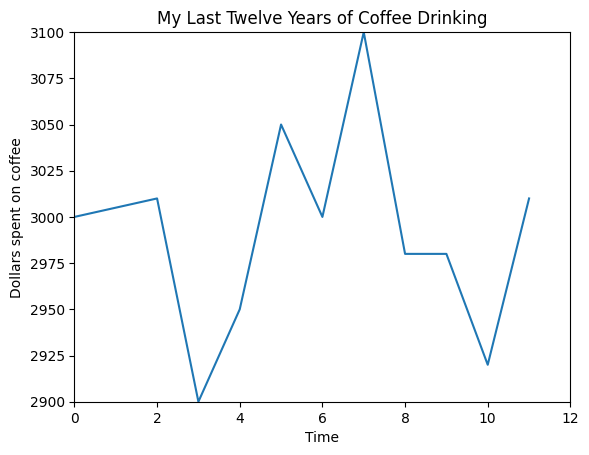

In [12]:
plt.plot(x, y)

plt.axis([0, 12, 2900, 3100])

plt.xlabel('Time')

plt.ylabel('Dollars spent on coffee')

plt.title('My Last Twelve Years of Coffee Drinking')

plt.show()

## Lab Task 5:

1. Using the plt.subplot command, plot temperature vs months in the left box of a figure that has 1 row with 2 columns.

2. Plot flights_to_hawaii vs temperature in the same figure, to the right of your first plot. Add the parameter "o" to the end of your call to plt.plot to make the plot into a scatterplot, if you want!

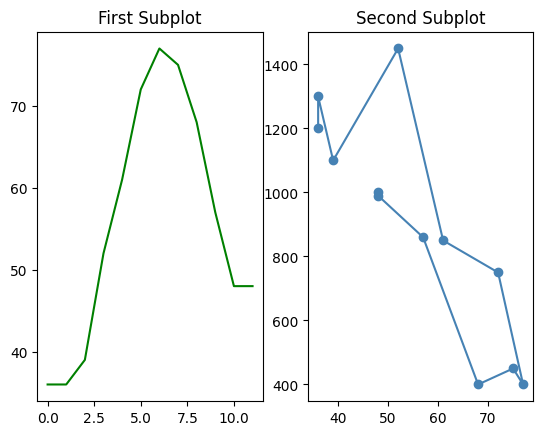

In [20]:
from matplotlib import pyplot as plt

months = range(12)

temperature = [36, 36, 39, 52, 61, 72, 77, 75, 68, 57, 48, 48]

flights_to_hawaii = [1200, 1300, 1100, 1450, 850, 750, 400, 450, 400, 860, 990, 1000]

# plt.subplot(row, column, left ->right)
plt.subplot(1,2,1)

plt.plot(months, temperature, color='green')

plt.title('First Subplot')

# Second Subplot

plt.subplot(1, 2, 2)

plt.plot(temperature, flights_to_hawaii, color='steelblue', marker='o')

plt.title('Second Subplot')

# Display both subplots

plt.show()

## Lab Task 6:
---
1. Create a figure that has two rows of subplots. It should have:
*   one subplot in the top row
*   two subplots in the bottom row

2. Plot straight_line vs x in this subplot you’ve selected. Now, use the plt.subplot() command to select the box in the first column of the second row (the one with a square in it). Plot parabola vs x in this box.

3. Now, use the plt.subplot() command to select the box in
the second column of the second row (the one with a triangle
in it). Plot cubic vs x in this box.

4. Increase the spacing between horizontal subplots to 0.35
and the bottom margin to 0.2.

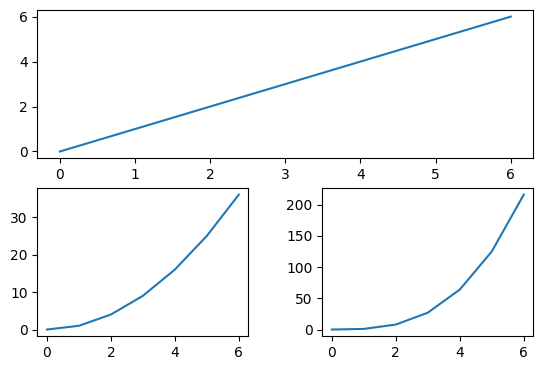

In [24]:
x = range(7)

straight_line = [0, 1, 2, 3, 4, 5, 6]

parabola = [0, 1, 4, 9, 16, 25, 36]

cubic = [0, 1, 8, 27, 64, 125, 216]

# Subplot 1

plt.subplot(2, 1, 1)

plt.plot(x, straight_line)

# Subplot 2

plt.subplot(2, 2, 3)

plt.plot(x, parabola)

# Subplot 3

plt.subplot(2, 2, 4)

plt.plot(x, cubic)

plt.subplots_adjust(wspace=0.35, bottom=0.2)

plt.show()

## Lab Task 6:

Consider the three plotted lines. They represent the temperatures over the past year in Hyrule, Kakariko, and the Gerudo Valley.

1. Create a list of strings containing "Hyrule", "Kakariko", and "Gerudo Valley", and store it in a variable called legend_labels.

2. Create a legend for the graph by feeding in legend_labels into plt.legend().

3. Set the legend to be at the lower center of the chart.

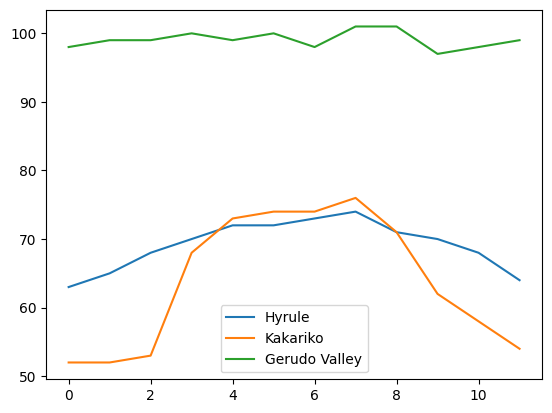

In [42]:
months = range(12)

hyrule = [63, 65, 68, 70, 72, 72, 73, 74, 71, 70, 68, 64]

kakariko = [52, 52, 53, 68, 73, 74, 74, 76, 71, 62, 58, 54]

gerudo = [98, 99, 99, 100, 99, 100, 98, 101, 101, 97, 98, 99]

plt.plot(months, hyrule)

plt.plot(months, kakariko)

plt.plot(months, gerudo)

legend_labels = ["Hyrule", "Kakariko", "Gerudo Valley"]

plt.legend(legend_labels, loc=8)

plt.show()

## Lab Task 7:

Let’s imagine we are working for a company called Dinnersaur, that delivers dinners to people who don’t want to cook. Dinnersaur recently started a new service that is subscription-based, where users sign up for a whole year
of meals, instead of buying meals on-demand.

1. First, save the set of axes in a variable called ax. We will use ax to set the x- and y-ticks and labels to make this graph easier to read.

2. Using ax, set the x-ticks to be the months list.

3. Set the x-tick labels to be the month_names list.

4. Set the y-ticks to be [0.10, 0.25, 0.5, 0.75].

5. Label the y-ticks to be the percentages that correspond to the values [0.10, 0.25, 0.5, 0.75], instead of decimals.

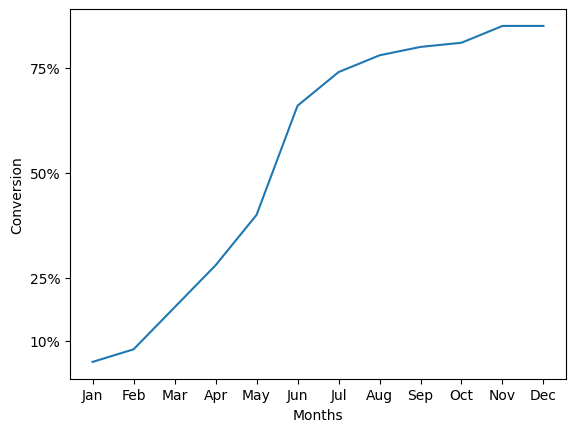

In [44]:
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep","Oct", "Nov", "Dec"]

months = range(12)

conversion = [0.05, 0.08, 0.18, 0.28, 0.4, 0.66, 0.74, 0.78, 0.8, 0.81, 0.85, 0.85]

plt.xlabel("Months")

plt.ylabel("Conversion")

plt.plot(months, conversion)

ax = plt.subplot()

ax.set_xticks(months)

ax.set_xticklabels(month_names)

ax.set_yticks([0.10, 0.25, 0.5, 0.75])

ax.set_yticklabels(["10%", "25%", "50%", "75%"])

plt.show()

## Final Exercise on Line Graphs in Matplotlib

1. Define three lists, x, y1, and y2 and fill them with integers. These numbers can be anything you want, but it would be neat to have them be actual metrics that you want to compare.

2. Plot y1 vs x and display the plot.

3. On the same graph, plot y2 vs x (after the line where you plot y1 vs x)

4. Make the y1 line a pink line and the y2 line a gray line. Give both lines round markers.

5. Give your graph a title of “Two Lines on One Graph”, and label the x-axis ”Amazing X-axis” and y-axis ”Incredible Y-axis”.

6. Give the graph a legend and put it in the lower right.

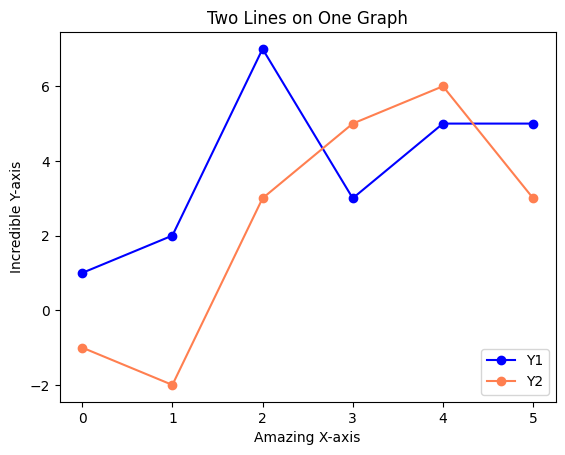

In [47]:
x = range(6)

y1 = [1, 2, 7, 3, 5, 5]

y2 = [-1, -2, 3, 5, 6, 3]

plt.plot(x, y1, marker='o', color='blue')

plt.plot(x, y2, marker='o', color='coral')

plt.title("Two Lines on One Graph")

plt.xlabel("Amazing X-axis")

plt.ylabel("Incredible Y-axis")

plt.legend(["Y1","Y2"], loc=4)

plt.show()

## Exercise 1 - page 50

Help the cafe MatplotSip analyze some of the sales data they have been collecting.

* Use plt.bar to plot numbers of drinks sold on the y-axis. The x-values of the graph should just be the list [0, 1 ... , n-1], where n is the number of categories (drinks) we are plotting. So at x=0, we’ll have the number of cappuccinos sold.

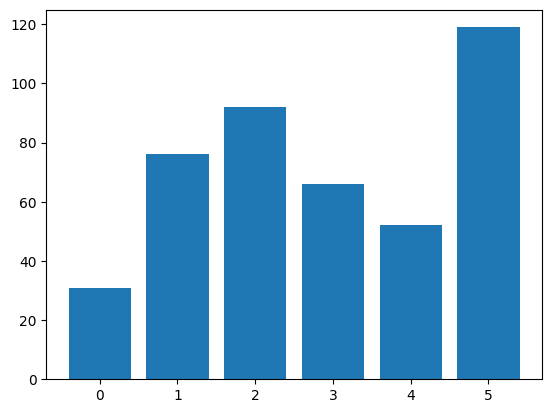

In [51]:
drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]

sales = [31, 76, 92, 66, 52, 119]

plt.bar(range(len(sales)), sales)

plt.show()

## Exercise 2:

The list drinks represents the drinks sold at MatplotSip. We are going to set x-tick labels on the chart you made with plt.bar in the last exercise.

1. First, create the axes object for the plot and store it in a variable called ax.

2. Set the x-axis ticks to be the numbers from 0 to the length of drinks.

3. Use the strings in the drinks list for the x-axis ticks of the plot you made with plt.bar.

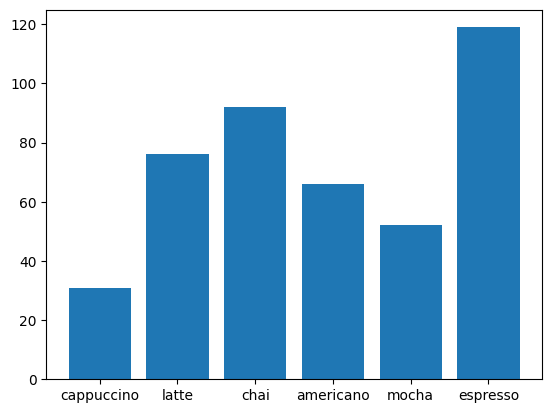

In [52]:
plt.bar(range(len(drinks)), sales)

ax = plt.subplot()

ax.set_xticks(range(6))

ax.set_xticklabels(drinks)

plt.show()

## Exercise 3

The second location of MatplotSip recently opened up, and the owners want to compare the drink choices of the clientele at the two different locations.

1. To do this, it will be helpful to have the sales of each drink plotted on the same axes. We have provided sales2, a list of values representing the sales of the same drinks at the second MatplotSip
location.

2. Use the plt.bar to position the bars corresponding to sales1 on the plot. The x-values for plt.bar should be the store1_x list that you just created.

In [71]:

drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]

sales1 = [-20, 76, 56, 66, 52, 27]

sales2 = [65, -30, 36, 68, 38, 40]


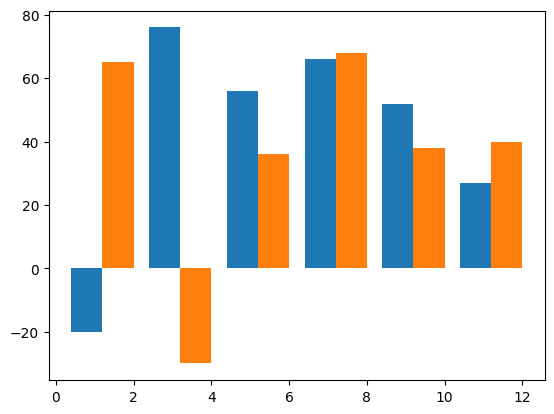

In [73]:
n = 1
t = 2
d = 6
w = 0.8

store1_x = [t*element + w*n for element in range(d)]

plt.bar(store1_x, sales1)

n = 2
t = 2
d = 6
w = 0.8

store2_x = [t*element + w*n for element in range(d)]

plt.bar(store2_x, sales2)

plt.show()


## Exercise 4

1. Put the sales1 bars on the bottom and set the sales2 bars to start where the sales1 bars end.

2. We should add a legend to make sure we know which set of bars corresponds to which location.

3. Label the bottom set of bars as “Location 1” and the top set of bars as “Location 2” and add a legend
to the chart.

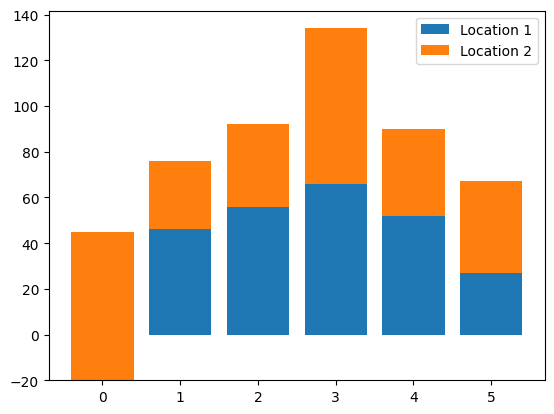

In [74]:
plt.bar(range(len(drinks)), sales1)

plt.bar(range(len(drinks)), sales2, bottom=sales1)

plt.legend(["Location 1", "Location 2"])

plt.show()

## Exercise

1. For someone who is learning about the different drink types at MatplotSip, a bar chart of milk amounts
in each drink may be useful. We have provided the ounces_of_milk list, which contains the amount of
milk in each 12oz drink in the drinks list. Plot this information as a bar chart.

2. According to different barista styles and measurement errors, there might be variation on how much milk actually goes into each drink. We’ve included a list error, with an error of 10% on each amount of milk. Display this error as error bars on the bar graph.

3. Add caps of size 5 to your error bars.

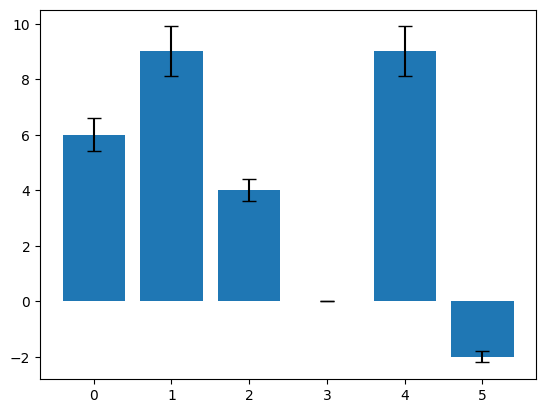

In [78]:
drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]

ounces_of_milk = [6, 9, 4, 0, 9, -2]

error = [0.6, 0.9, 0.4, 0, 0.9, 0.2]

plt.bar(range(len(drinks)), ounces_of_milk, yerr=error, capsize=5)

ax.set_xticklabels(drinks)

plt.show()

## Exercise:

MatplotSip keeps track of how many people pay by credit card, cash, Apple pay, or other methods. This is given to you in the payment_method_names and payment_method_freqs lists.

1. Display the payment_method_freqs list as a pie chart.

2. Now, set the axes to be equal.

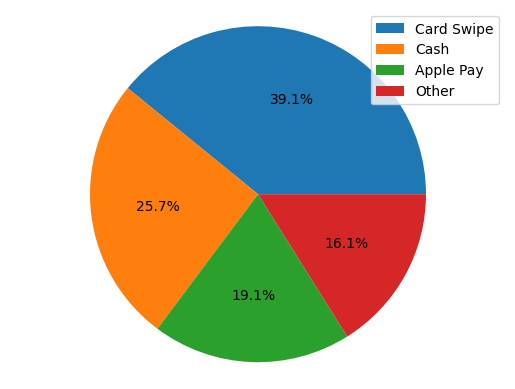

In [81]:

payment_method_names = ["Card Swipe", "Cash", "Apple Pay", "Other"]

payment_method_freqs = [270, 177, 132, 111]

plt.pie(payment_method_freqs, autopct="%0.1f%%")

plt.axis('equal')

plt.legend(payment_method_names)

plt.show()

# **Histogram**

## Task 1:

1. Use Pandas to load in the data from results.csv and save it to the variable df.

2. Display df using print

3. Remove all of the # characters from in front of the sns.barplot command and fill in the missing values.

4. Type plt.show() to display the completed bar plot.

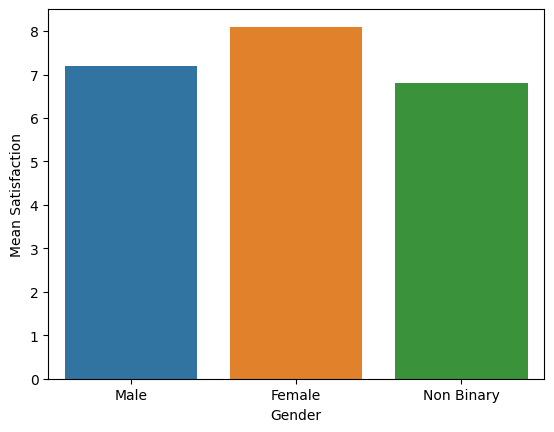

In [82]:

data = {'Gender': ['Male', 'Female', 'Non Binary'],
        'Mean Satisfaction': [7.2, 8.1, 6.8]}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Gender', y='Mean Satisfaction')

plt.show()

## Task 2
The DataFrame gradebook contains the complete gradebook for a hypothetical classroom. Use print to examine gradebook.

Select all rows from the gradebook DataFrame where assignment_name is equal to Assignment 1. Save the result to the variable assignment1. Print assignment1.

Now use Numpy to calculate the median grade in assignment1. Use np.median() to calculate the median of the column grade from assignment1 and save it to asn1_median.

Display asn1_median using print. What is the median grade on Assignment 1?

In [98]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
data = {'student': ['Amy', 'Amy', 'Bob', 'Bob', 'Chris', 'Chris', 'Dan', 'Dan', 'Ellie', 'Ellie'],
        'Assignment_name': ['A_1', 'A_2', 'A_1', 'A_2', 'A_1', 'A_2', 'A_1', 'A_2', 'A_1', 'A_2'],
        'grade': ['75', '82', '99', '90', '72', '66', '88', '82', '91', '85']}

gradebook = pd.DataFrame(data)

print("Gradebook:")
print(gradebook)

assignment1 = gradebook[gradebook.Assignment_name =='A_1']

print("\nAssignment 1:")
print(assignment1)

assignment1['grade'] = assignment1['grade'].astype('int')
asn1_median = np.median(assignment1.grade)

print("\nMean: ", asn1_median)


Gradebook:
  student Assignment_name grade
0     Amy             A_1    75
1     Amy             A_2    82
2     Bob             A_1    99
3     Bob             A_2    90
4   Chris             A_1    72
5   Chris             A_2    66
6     Dan             A_1    88
7     Dan             A_2    82
8   Ellie             A_1    91
9   Ellie             A_2    85

Assignment 1:
  student Assignment_name grade
0     Amy             A_1    75
2     Bob             A_1    99
4   Chris             A_1    72
6     Dan             A_1    88
8   Ellie             A_1    91

Mean:  88.0


## Task 3:

1. Use Seaborn to plot the average grade for each assignment. Take a look at gradebook.csv for the column names.

2. Use plt.show() to display the graph.

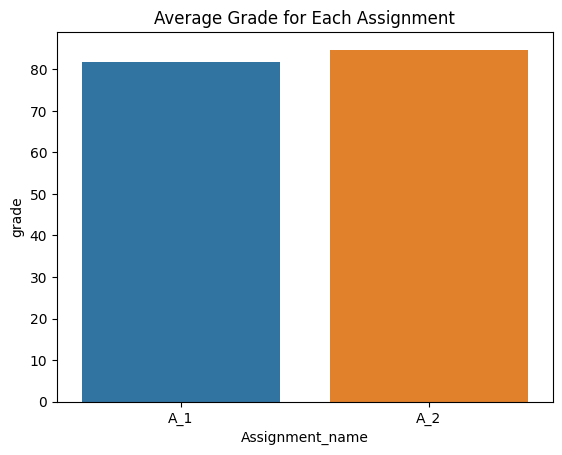

In [105]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data = {'student': ['Amy', 'Amy', 'Bob', 'Bob', 'Chris', 'Chris', 'Dan', 'Dan', 'Ellie', 'Ellie'],
        'Assignment_name': ['A_1', 'A_2', 'A_1', 'A_2', 'A_1', 'A_1', 'A_1', 'A_2', 'A_1', 'A_2'],
        'grade': [75, 82, 99, 90, 72, 66, 88, 82, 91, 85]}

df = pd.DataFrame(data)

average_grade = df.groupby('Assignment_name')['grade'].mean().reset_index()

sns.barplot(data=average_grade, x='Assignment_name', y='grade')
plt.title('Average Grade for Each Assignment')

plt.show()


## Task 4:

Modify the bar plot so that the error bars represent one standard deviation, rather than 95% confidence intervals.

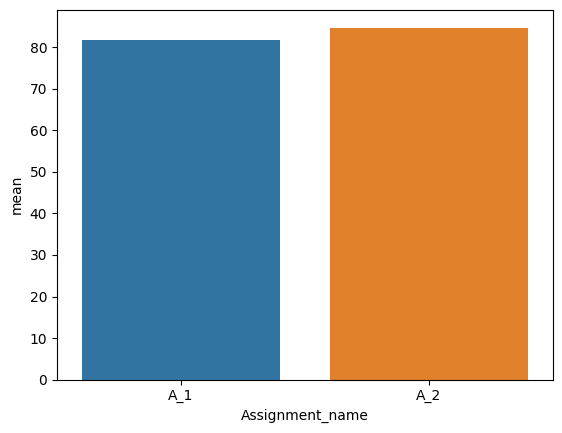

In [107]:
avg = df.groupby('Assignment_name')['grade'].agg(['mean', 'std']).reset_index()

sns.barplot(data=avg, x='Assignment_name', y='mean', ci="sd", estimator=np.median)

plt.show()


## Seaborn

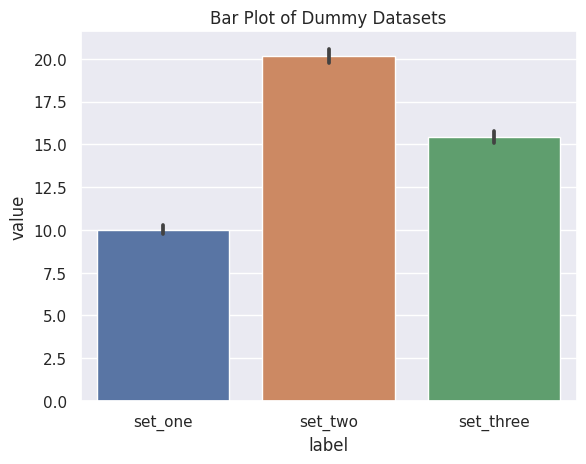

In [121]:
np.random.seed(42)

dataset1 = np.random.normal(loc=10, scale=3, size=500)
dataset2 = np.random.normal(loc=20, scale=5, size=500)
dataset3 = np.random.normal(loc=15, scale=4, size=500)

n = 500
df = pd.DataFrame({
    "label": ["set_one"] * n + ["set_two"] * n + ["set_three"] * n,
    "value": np.concatenate([dataset1, dataset2, dataset3])
})

sns.set()
sns.barplot(data=df, x="label", y="value")
plt.title("Bar Plot of Dummy Datasets")
plt.show()


## KDE

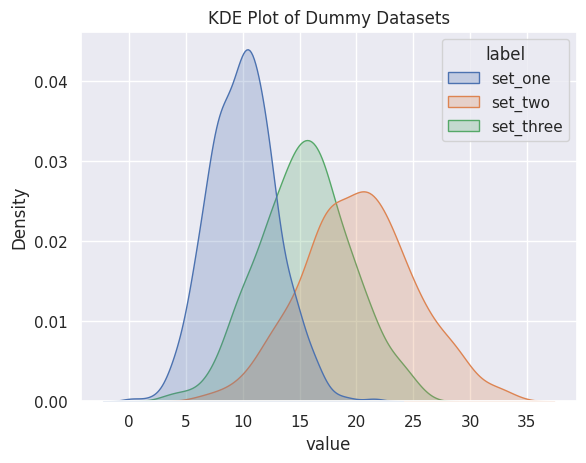

In [122]:
sns.set()
sns.kdeplot(data=df, x="value", hue="label", shade=True)
plt.title("KDE Plot of Dummy Datasets")
plt.show()

## Violin

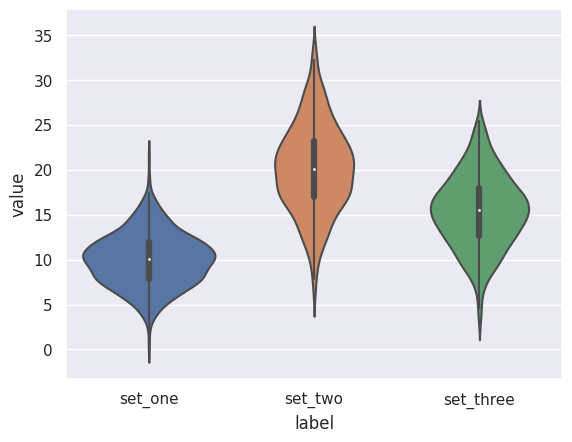

In [123]:
sns.violinplot(data=df, x="label", y="value")

plt.show()

## Box Plot

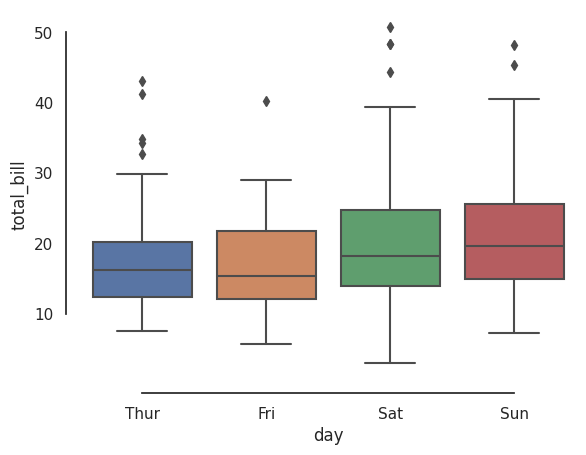

In [125]:

sns.set(style="white", color_codes=True)

a = sns.load_dataset("tips")

sns.boxplot(x="day", y="total_bill", data=a);

sns.despine(offset=10, trim=True);

## Line Plot

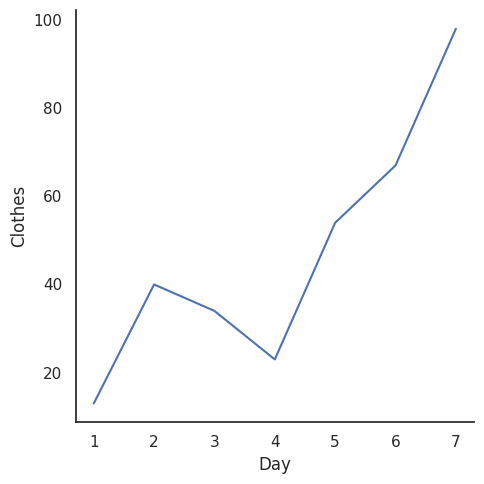

In [127]:
a=pd.DataFrame({'Day':[1,2,3,4,5,6,7],
                'Grocery':[30,80,45,23,51,46,76],
                'Clothes':[13,40,34,23,54,67,98],
                'Utensils':[12,32,27,56,87,54,34]},
               index=[1,2,3,4,5,6,7])

sns.relplot(x="Day", y="Clothes", kind="line", data=a)

## Categorical Data

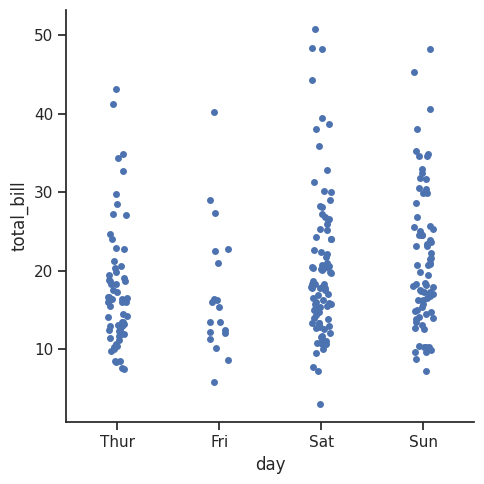

In [128]:
sns.set(style="ticks", color_codes=True)

a = sns.load_dataset("tips")

sns.catplot(x="day", y="total_bill", data=a);


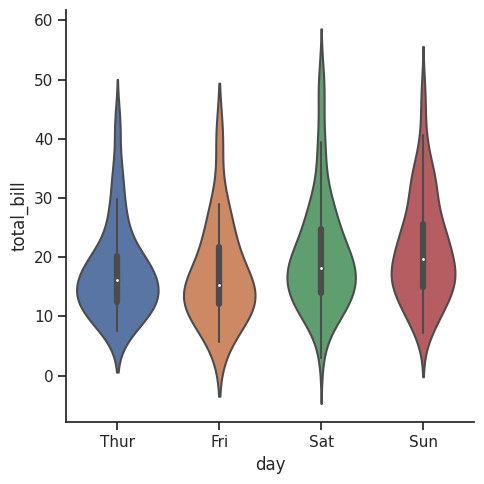

In [129]:

sns.set(style="ticks", color_codes=True)

a = sns.load_dataset("tips")

sns.catplot(x="day", y="total_bill", kind="violin", data=a);

## Multiplot grids

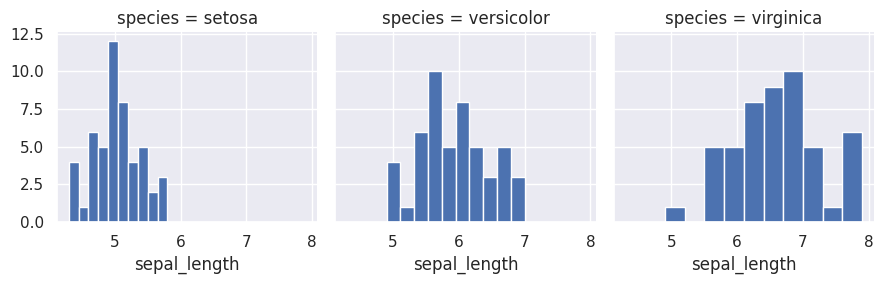

In [130]:
sns.set(style="darkgrid")

a = sns.load_dataset("iris")

b = sns.FacetGrid(a, col="species")

b.map(plt.hist, "sepal_length");

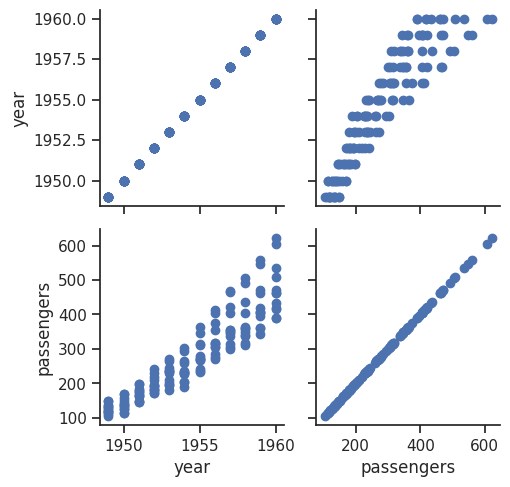

In [131]:
sns.set(style="ticks")

a = sns.load_dataset("flights")

b = sns.PairGrid(a)

b.map(plt.scatter);